# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [56]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, skeletonize, thin, square
from skimage.measure import find_contours
from skimage.draw import rectangle, rectangle_perimeter

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


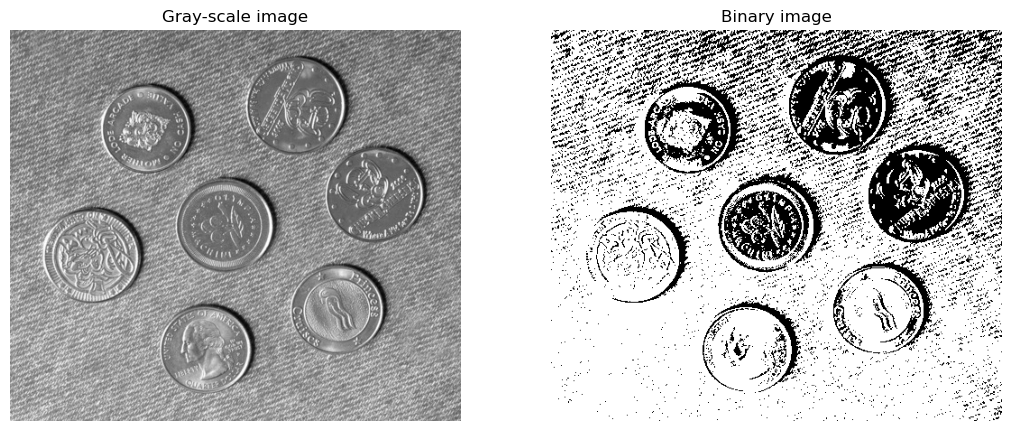

In [57]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

img = io.imread('img/coins.jpg', True)
binary_img = img > 0.5
show_images([img, binary_img], ['Gray-scale image', 'Binary image'] )

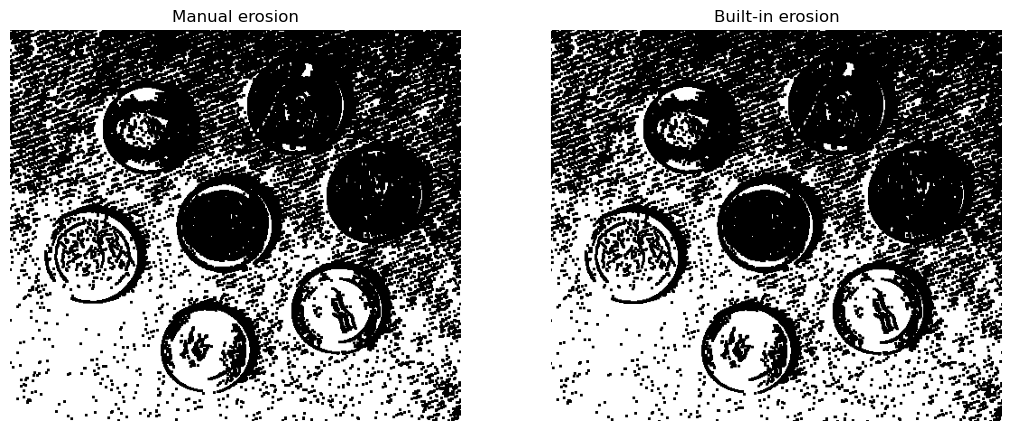

In [58]:
def erosion(img, kernel_height, kernel_width):
    rows = []
    
    for i in range(img.shape[0] - kernel_height + 1):
        row = []
    
        for j in range(img.shape[1] - kernel_width + 1):
            row.append((img[i:i + kernel_height, j: j + kernel_width]).min())
            
        rows.append(row)
    
    return np.array(rows)

structure_element = np.ones((3, 3))

builtin_erosion = binary_erosion(binary_img, structure_element)
manual_erosion = erosion(binary_img, 3, 3)

show_images([builtin_erosion, manual_erosion], ['Manual erosion', 'Built-in erosion'])

In [59]:
# def dilation(img, kernel_height, kernel_width):
#     rows = []

#     for i in range(img.shape[0] - kernel_height + 1):
#         row = []
    
#         for j in range(img.shape[1] - kernel_width + 1):
#             row.append((img[i:i + kernel_height, j: j + kernel_width]).max())
            
#         rows.append(row)
    
#     return np.array(rows)

# manual_dilation = dilation(binary_img, 3, 3)
# builtin_dilation = binary_dilation(binary_img, structure_element)

# show_images([manual_dilation, builtin_dilation], ['Manual dilation', 'Built-in dilation'])

def dilation(img, dx, dy):
    n_img = []
    img = np.pad(img, (dx // 2, dy // 2), constant_values= 1)

    for i in range(0, img.shape[0] - dx + 1, 1):
        row = []
        
        for j in range(0, img.shape[1] - dy + 1, 1):
            row.append((img[i:i + dx, j: j + dy]).max())
            
        n_img.append(row)
    
    return np.array(n_img)

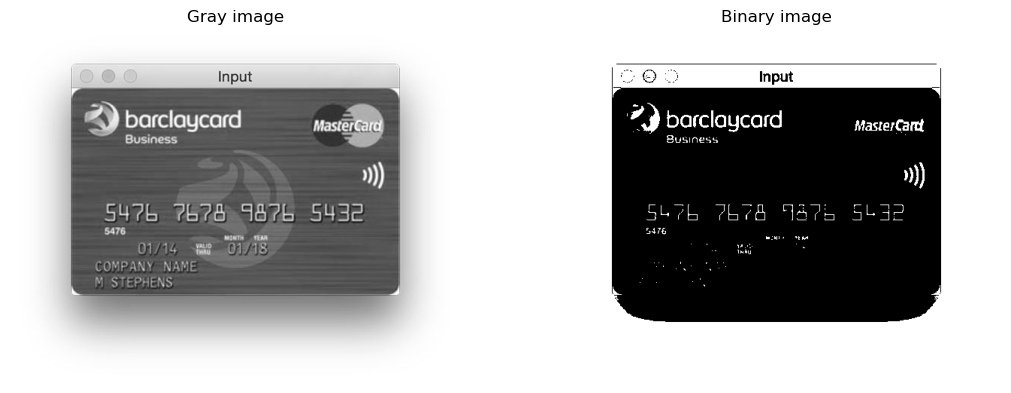

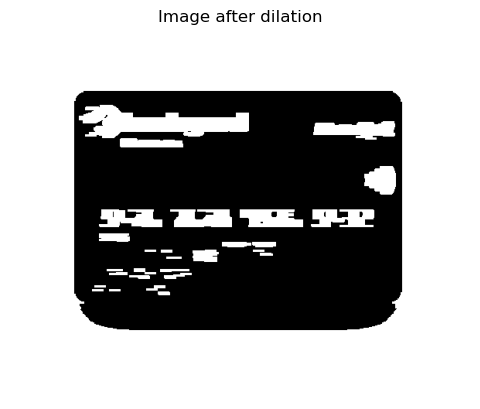

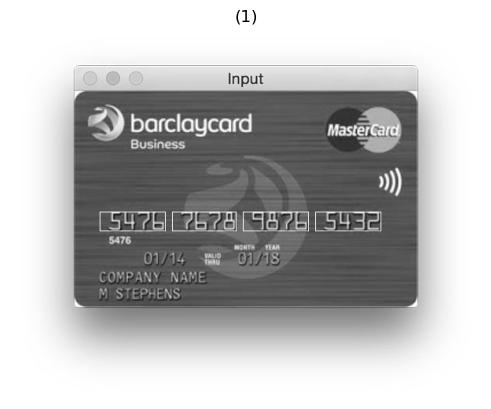

In [151]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

img = io.imread('img/card.jpg', True)
binary_img = (img > 0.75).astype(np.byte)

titles = ['Gray image', 'Binary image'] 
show_images([img, binary_img], titles)


filt = np.ones((2, 5))
res = dilation(binary_img, 2, 8)
res = dilation(res, 2, 8)
# res = dilation(res, 2, 6)

show_images([res], ['Image after dilation'])

contours = find_contours(res, 0.8)

bounding_boxes = []
for contour in contours:
    x_min = np.min(contour[:, 1])
    x_max = np.max(contour[:, 1])
    y_min = np.min(contour[:, 0])
    y_max = np.max(contour[:, 0])

    aspect_ratio = (x_max - x_min) / (y_max - y_min)

    if 3.51 < aspect_ratio < 3.65 :
        bounding_boxes.append((x_min, x_max, y_min, y_max))

img_with_boxes = img.copy()

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    # rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    rr, cc = rectangle_perimeter(start=(Ymin, Xmin), end=(Ymax, Xmax), shape=img_with_boxes.shape)
    img_with_boxes[rr.astype(int), cc.astype(int)] = 1 #set color white
    
show_images([img_with_boxes])

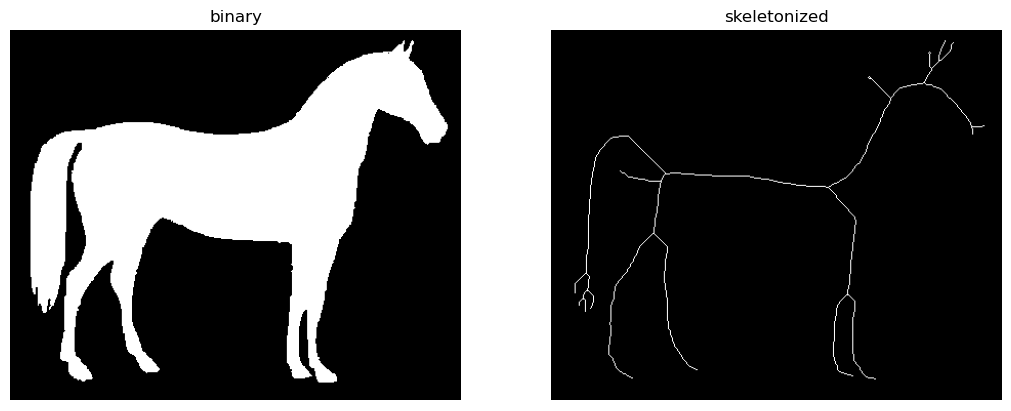

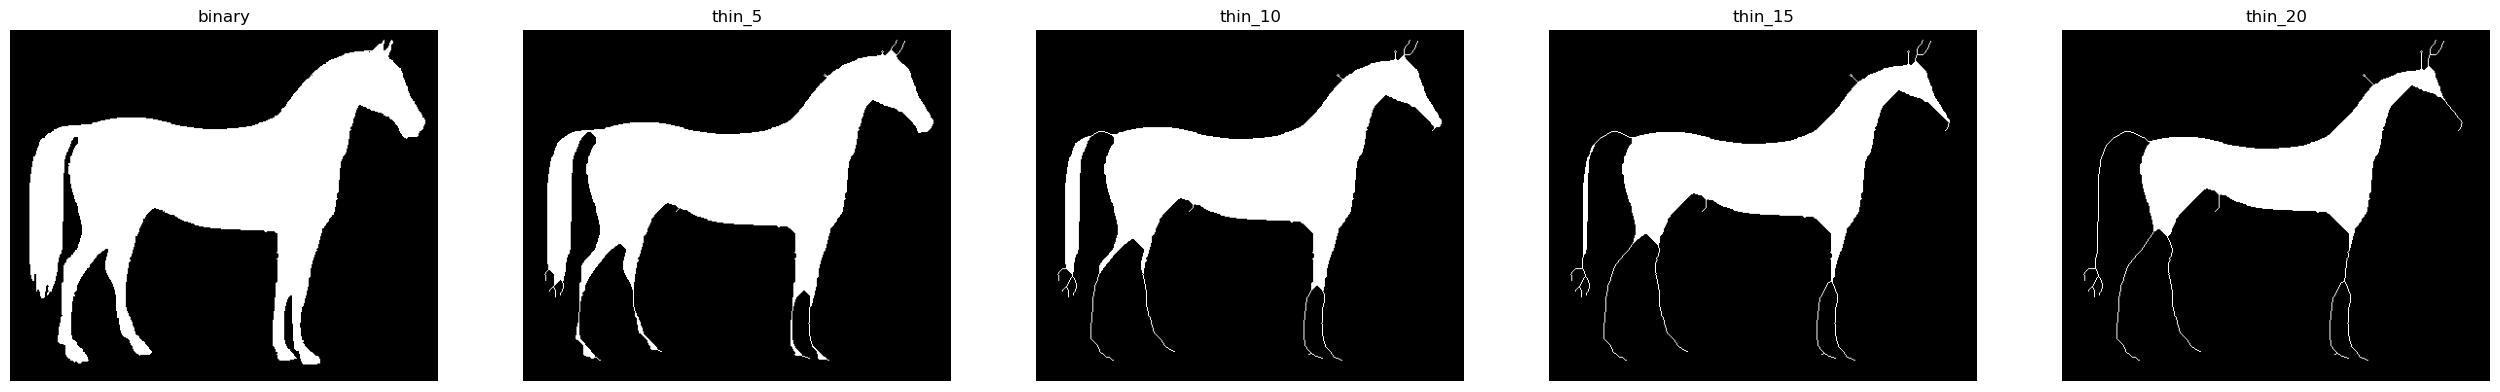

In [61]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = rgb2gray(io.imread('./img/horse.jpg'))
binary_img = img > 0.9

skeletonized = skeletonize(binary_img)

show_images([binary_img, skeletonized],
            ['binary', 'skeletonized'])

thin_5 = binary_img.copy()
thin_10 = binary_img.copy()
thin_15 = binary_img.copy()
thin_20 = binary_img.copy()

thin(thin_5, max_num_iter=5)
thin(thin_10, max_num_iter=10)
thin(thin_15, max_num_iter=15)
thin(thin_20, max_num_iter=20)


show_images([binary_img, thin_5, thin_10, thin_15, thin_20],
            ['binary', 'thin_5', 'thin_10', 'thin_15', 'thin_20'])

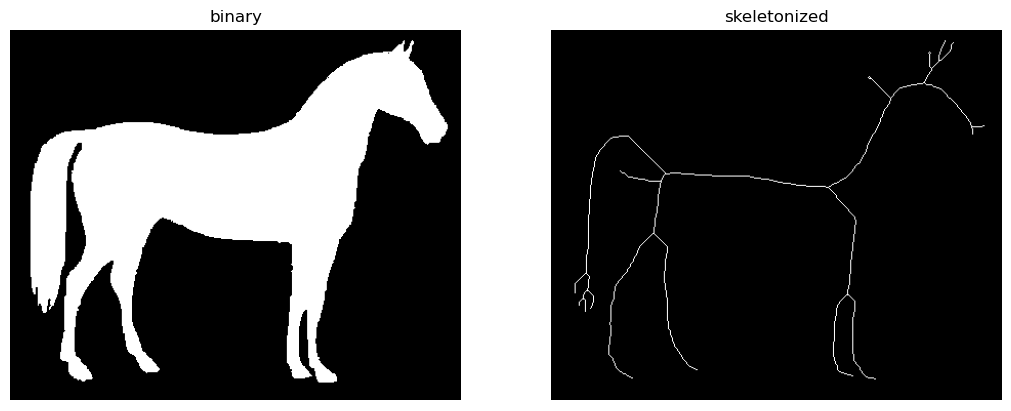

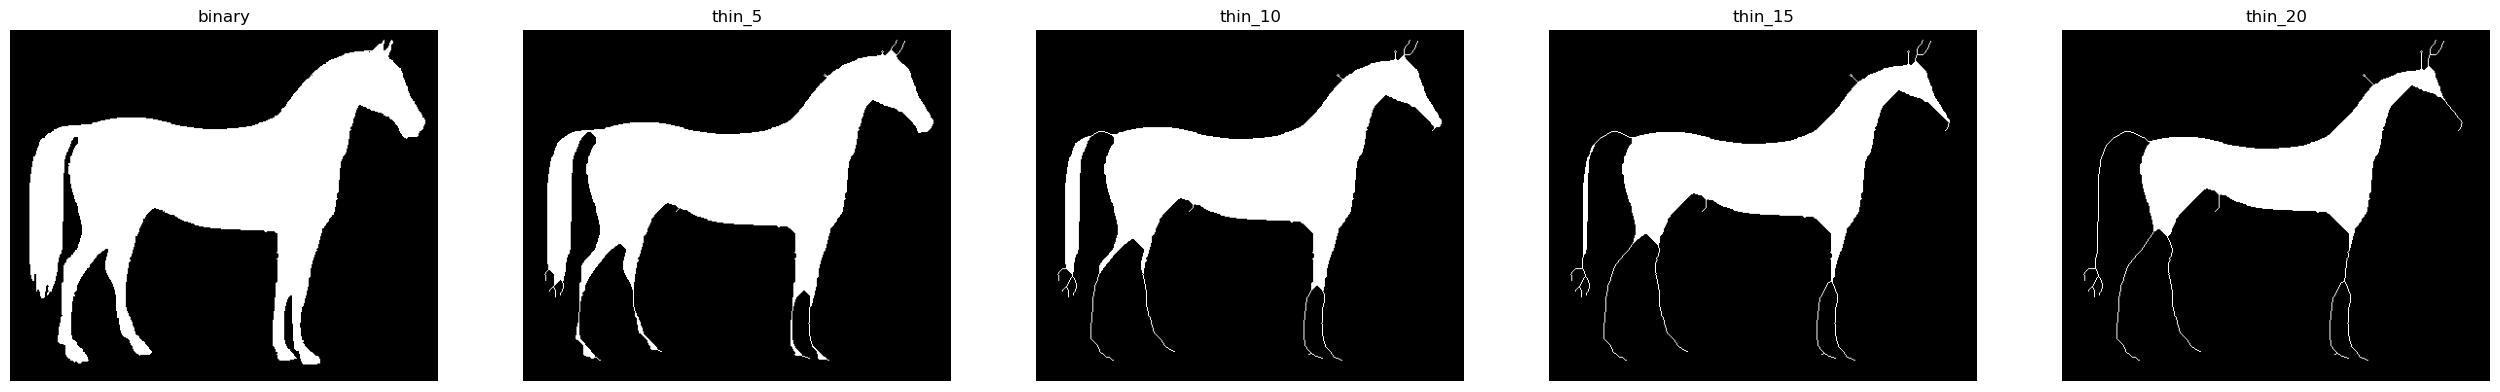

In [62]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = rgb2gray(io.imread('./img/horse.jpg'))
binary_img = img > 0.9

skeletonized = skeletonize(binary_img)

show_images([binary_img, skeletonized],
            ['binary', 'skeletonized'])

thin_5 = binary_img.copy()
thin_10 = binary_img.copy()
thin_15 = binary_img.copy()
thin_20 = binary_img.copy()

thin(thin_5, max_num_iter=5)
thin(thin_10, max_num_iter=10)
thin(thin_15, max_num_iter=15)
thin(thin_20, max_num_iter=20)


show_images([binary_img, thin_5, thin_10, thin_15, thin_20],
            ['binary', 'thin_5', 'thin_10', 'thin_15', 'thin_20'])